<a href="https://colab.research.google.com/github/guiaech/projeto-integrador-IIIB/blob/main/Projeto_integrador_IIIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLTK (Natural Language Toolkit)**

Essa biblioteca contém pacotes para fazer com que as maquinas entendam a liguagem humana.

In [188]:
!pip install nltk #Instalando a biblioteca

In [189]:
import nltk

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

# **Criando o modelo para classificar os tweets em positivo, negativo ou neutro.**

In [190]:
# Importando as bibliotecas que iremos utilizar:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [191]:
classificados = pd.read_csv('tweets_classificados.csv') #Abrindo arquivo csv e definindo como objeto com dados já classificados

In [192]:
classificados.Classificacao.value_counts()  #verificando a quantidade de dados classificados com cada sentimento

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

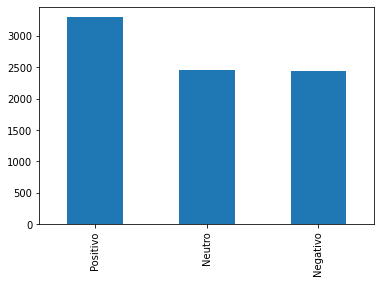

In [193]:
classificados.Classificacao.value_counts().plot(kind='bar') #Gerando um grafico de barras com os dados classificados com cada sentimento

In [194]:
#Observando o tamanho do Data Frame
classificados.Text.count()

8199

In [195]:
#Remover os dados repetidos como os ReTweets
classificados.drop_duplicates(['Text'], inplace=True) #

In [196]:
#Observando o tamanho do Data Frame
classificados.Text.count()

5765

In [197]:
# Separando texto e suas classes:
texto = classificados['Text']
classes = classificados['Classificacao']

# **Stopwords**

 . São palavras e termos frequentes porém que não possuem relevância nas sentenças

. Exemplos: as, os, um, com, de, da, para, etc...

. O nltk possui uma lista de stopwords em 16 idiomas diferentes. Vamos criar função que remova todas as stopwords em POrtuguês.

# **Remove caracteres indesejados como links...**


Essa etapa é para retirar dados indesejados que não trazem nenhuma informação\

In [198]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [199]:
def Preprocessing(instancia):
     instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
     stopwords = set(nltk.corpus.stopwords.words('portuguese'))
     palavras = [i for i in instancia.split() if not i in stopwords]
     return (" ".join(palavras))

In [200]:
# Aplica a função em todos os dados:
from nltk.corpus import stopwords
texto = [Preprocessing(i) for i in texto]

In [201]:
texto[:10]

['���⛪ @ catedral santo antônio governador valadares/mg',
 '� @ governador valadares, minas gerais',
 '�� @ governador valadares, minas gerais',
 '���',
 '��� psol vai questionar aumento vereadores prefeito bh justiça politica estado minas',
 'bom bandido morto deputado cabo júlio condenado fica inelegível 10 anos politica estado minas',
 '25% mineiros dizem torcer time nenhum,mesmo dentro estado atléticomg cruzeiro pq?',
 'gigantesca barba mal destaque caderno cultura estado minas',
 'bb governo minas travam disputa sobre depósitos judiciais',
 'vcs bh fica pequena! belo horizonte (pron [bɛloɾiˈzõntʃi][10] capital estado mg, área aproximadamente 331 km²']

# **Tokenização**

É o processo de tokenizar é pegar as strings e dividir em uma lista de tokens.

Exemplo : Aprendendo Data Science para valer

Fica : [ 'Aprendendo' , 'Data', 'Science' , 'para', 'valer']

In [202]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer() 

In [203]:
# Instancia o objeto que faz a vetorização dos dados de texto:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

In [204]:
# Aplica o vetorizador nos dados de texto e retorna uma matriz esparsa ( contendo vários zeros):
freq_tweets = vectorizer.fit_transform(texto)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [205]:
# Visualizando o número de linhas e colunas da matriz:
freq_tweets.shape

(5765, 7336)

In [206]:
# Treino de modelo de Machine Learning:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [207]:
# Probabilidades de cada classe:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.68, 0.32, 0.  ],
       [0.09, 0.88, 0.03],
       [0.99, 0.01, 0.  ],
       [0.36, 0.64, 0.  ],
       [0.1 , 0.9 , 0.  ]])

In [208]:
# Vetorizando os dados e passando o classificador:
from sklearn.pipeline import Pipeline
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])
pipeline_simples.fit(texto,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [227]:
modelosvm = svm.SVC(kernel='linear')

In [228]:
# Pipeline simples:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [210]:
# Fazendo o cross validation do modelo:
resultados = cross_val_predict(pipeline_simples, texto, classes, cv=10)

In [211]:
# Medindo a acurácia média do modelo:
metrics.accuracy_score(classes,resultados)

0.8742411101474414

In [212]:
# Matriz de confusão:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       852      94         5   951
Neutro         205    1675        94  1974
Positivo        55     272      2513  2840
All           1112    2041      2612  5765


In [213]:
from sklearn import metrics

# Medidas de validação do modelo:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.77      0.90      0.83       951
      Neutro       0.82      0.85      0.83      1974
    Positivo       0.96      0.88      0.92      2840

    accuracy                           0.87      5765
   macro avg       0.85      0.88      0.86      5765
weighted avg       0.88      0.87      0.88      5765



# **Consumindo tweets reais para analisar com o algoritmo já treinado**

In [66]:
#Instalação da biblioteca
!pip install TwitterSearch

  Created wheel for TwitterSearch: filename=TwitterSearch-1.0.2-py3-none-any.whl size=18464 sha256=89fc6167664a6dabc9243190f86982a4f2cd012b50b7c2aa359a07b112261c22
  Stored in directory: /root/.cache/pip/wheels/d5/74/5f/f344ffff31a93ee504581a51aad34120bf05bd749493365840
Successfully built TwitterSearch


In [67]:
#Importação das bibliotecas
from datetime import datetime
import json

In [68]:
#Definindo as chaves fornecidas pelo twitter para consumo da API
consumer_key = 'IMJh4kjQLGDzUaT9t1v0RXm5Y'
consumer_secret = 'cjt9d684CpvElXof1BxUMgSakNnFBVLDweQTSpGZolzzrnU8JE'

In [69]:
#Definindo os tokens fornecidos pelo twitter para consumo da API
access_token = '968521944944529408-oI5NcJVaZellwrsPjhsQkQPDeAZJzKf'
access_token_secret = 'hc7bTI65fG97smD3ZEB6iCjLrBzHBxn2Sp6TIaX8fZSJZ'

# **LULA**

In [155]:
from TwitterSearch import *                                                                                                                     #Importando a biblioteca para consumo da API do Twitter
try:

    ts = TwitterSearch(                                                                                                                              #Objeto TwitterSearch object
        consumer_key = consumer_key,
        consumer_secret = consumer_secret,
        access_token = access_token,
        access_token_secret = access_token_secret
     )

    tso = TwitterSearchOrder()                                                                                                                  #Criando o objeto TwitterSearchOrder
    tso.set_keywords(['lula'], or_operator = True)                                                                                     #Definindo as palavras chaves para a pesquisa
    tso.set_language('pt')                                                                                                                          #Definindo a língua a ser pesquisada

    for tweet in ts.search_tweets_iterable(tso):                                                                                         # ts.search_tweets_iterable(tso) é um metadata
        print( 'created_at: ', tweet['created_at'], 'User_id: ', tweet['id_str'], 'Tweet: ', tweet['text']  )             #Definindo quais atributos serão mostrados
        created_at = tweet['created_at']
        user_id = tweet['id_str']
        texto = tweet['text']

        with open("tweet.json", "a+") as output:                                                                                          #Criando arquivo JSON para recebimento dos dados

          data = {
              "created_at": created_at,
              "User_id": user_id,
              "tweet": texto
          }
          output.write("{}\n".format(json.dumps(data)))                                                                                #Preenchendo os dados no arquivo JSON

except TwitterSearchException as e:
    print(e)

Error 429: ('Too Many Requests: Request cannot be served ', "due to the application's rate limit having ", 'been exhausted for the resource')


In [214]:
import pandas as pd                                                                                                                                #Importando biblioteca
df = pd.read_json('tweet.json', lines = True)                                                                                            #Definindo variavel para receber o arquivo JSON
df.head(10)                                                                                                                                              #Abrindo as 10 primeiras linhas do arquivo JSON

,created_at,User_id,tweet
0,2021-12-04 13:03:47+00:00,1467117430061379584,RT @ladyrasta: Eu vou votar no Lula provavelme...
1,2021-12-04 13:03:46+00:00,1467117426609618944,"RT @ValdiviaLiette: Lula, PT e as mulheres ind..."
2,2021-12-04 13:03:46+00:00,1467117425439166464,Lula destruiu no pode pah merereu
3,2021-12-04 13:03:46+00:00,1467117424252174336,"RT @Vdevaleime: ""Decepcionado com o Lula no po..."
4,2021-12-04 13:03:44+00:00,1467117417704968192,RT @Luis_augs: Muito vivido para cair em papin...
5,2021-12-04 13:03:43+00:00,1467117413229543424,RT @Trom_Petista: E aí meninada que viu o LULA...
6,2021-12-04 13:03:41+00:00,1467117405293924352,RT @KellVila: Que loucura ter crescido no gove...
7,2021-12-04 13:03:41+00:00,1467117404845412352,"RT @guimafilho0408: Aí o cara posta: ""Nem Lula..."
8,2021-12-04 13:03:41+00:00,1467117403561672704,RT @LucianoHangBr: Quem fala o que quer houve ...
9,2021-12-04 13:03:40+00:00,1467117397882687488,"Silenciei a conta do Lula, a palavra Lula, e a..."


In [215]:
df.drop_duplicates(['tweet'], inplace=True)                                                                                              #Retirando os dados duplicados
lula = df[ : 5000 ]                                                                                                                                      #Pegando as 5 mil linhas para analisar
lulaa = lula['tweet']                                                                                                                                   #Pegando somente a coluna de tweets para a analise 
lulaa = [Preprocessing(i) for i in lulaa]                                                                                                     #limpenza dos dados 

In [216]:
# Transforma os dados de teste em vetores de palavras:
freq_lula = vectorizer.transform(lulaa)

In [217]:
# Fazendo a classificação com o modelo treinado:
for t, c in zip (lulaa,modelo.predict(freq_lula)):
     
          with open ('lula_class.json', "a+") as output:
            datalula = {
                "tweet": t,
                "sentimento": c
            }
            output.write("{}\n".format(json.dumps(datalula)))


In [218]:
lularesul = pd.read_json("lula_class.json", lines=True)

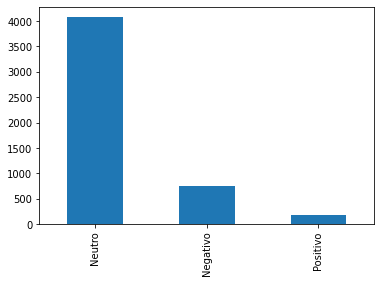

In [219]:
lularesul.sentimento.value_counts().plot(kind='bar')

In [220]:
lularesul.sentimento.value_counts()

Neutro      4080
Negativo     750
Positivo     170
Name: sentimento, dtype: int64

# **BOLSONARO**

In [ ]:
from TwitterSearch import *                                                                                                                     #Importando a biblioteca para consumo da API do Twitter
try:

    ts = TwitterSearch(                                                                                                                               #Objeto TwitterSearch object
        consumer_key = consumer_key,
        consumer_secret = consumer_secret,
        access_token = access_token,
        access_token_secret = access_token_secret
     )

    tso = TwitterSearchOrder()                                                                                                                  #Criando o objeto TwitterSearchOrder
    tso.set_keywords(['bolsonaro'], or_operator = True)                                                                           #Definindo as palavras chaves para a pesquisa
    tso.set_language('pt')                                                                                                                          #Definindo a língua a ser pesquisada

    for tweet in ts.search_tweets_iterable(tso):                                                                                         # ts.search_tweets_iterable(tso) é um metadata
        print( 'created_at: ', tweet['created_at'], 'User_id: ', tweet['id_str'], 'Tweet: ', tweet['text']  )             #Definindo quais atributos serão mostrados
        created_at = tweet['created_at']
        user_id = tweet['id_str']
        texto = tweet['text']

        with open("tweet_bolsonaro.json", "a+") as output:                                                                        #Criando arquivo JSON para recebimento dos dados

          data = {
              "created_at": created_at,
              "User_id": user_id,
              "tweet": texto
          }
          output.write("{}\n".format(json.dumps(data)))                                                                                #Preenchendo os dados no arquivo JSON

except TwitterSearchException as e:
    print(e)

In [164]:
import pandas as pd                                                                                                                                #Importando biblioteca
dfbolsonaro = pd.read_json('tweet_bolsonaro.json', lines = True)                                                          #Definindo variavel para receber o arquivo JSON
dfbolsonaro.head(10)                                                                                                                              #Abrindo as 10 primeiras linhas do arquivo JSON

,created_at,User_id,tweet
0,2021-12-04 13:21:25+00:00,1467121867458854912,RT @BrazilFight: SANTOS CRUZ DETONA BOLSONARO\...
1,2021-12-04 13:21:25+00:00,1467121866523426816,RT @JornalDaCidadeO: URGENTE: Pesquisa revela ...
2,2021-12-04 13:21:23+00:00,1467121860366286848,RT @cartacapital: Ciro: Moro acobertou a ladro...
3,2021-12-04 13:21:23+00:00,1467121859753820160,RT @neylopesmachado: #4D | Quinze cidades já c...
4,2021-12-04 13:21:23+00:00,1467121858495533056,"@FernandoHortaOf A questão é, depois de Bolson..."
5,2021-12-04 13:21:22+00:00,1467121854016114688,RT @JornalDaCidadeO: URGENTE: Pesquisa revela ...
6,2021-12-04 13:21:21+00:00,1467121848844537856,@DCM_online BOLSONARO ESTÁ MATANDO ÍNDIOS E QU...
7,2021-12-04 13:21:20+00:00,1467121846034255872,@PaulinoBrandim @doce_pimenta13 @sacha_faria @...
8,2021-12-04 13:21:20+00:00,1467121845845565440,@RubensOtoni Sugestão: passar a colocar Bolson...
9,2021-12-04 13:21:20+00:00,1467121844855656448,@OGloboPolitica @AmendoncaAGU Michele Bolsonar...


In [165]:
dfbolsonaro.drop_duplicates(['tweet'], inplace=True)                                                                              #Retirando os dados duplicados
bolsonaro = dfbolsonaro[ : 5000 ]                                                                                                            #Pegando as 5 mil linhas para analisar
bolsonaroo = bolsonaro['tweet']                                                                                                               #Pegando somente a coluna de tweets para a analise 
bolsonaroo = [Preprocessing(i) for i in bolsonaroo]                                                                                 #limpenza dos dados 

In [166]:
# Transforma os dados de teste em vetores de palavras:
freq_bolso = vectorizer.transform(bolsonaroo)

In [167]:
# Fazendo a classificação com o modelo treinado:
for t, c in zip (bolsonaroo,modelo.predict(freq_bolso)):
     
          with open ('bolso_clas.json', "a+") as output:
            databolso = {
                "tweet": t,
                "sentimento": c
            }
            output.write("{}\n".format(json.dumps(databolso)))


In [168]:
bolsoresu = pd.read_json("bolso_clas.json", lines=True)

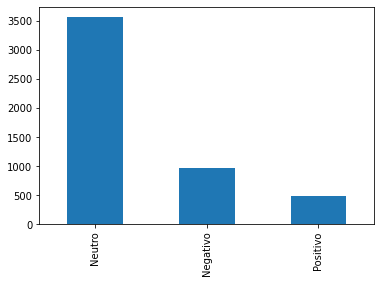

In [169]:
bolsoresu.sentimento.value_counts().plot(kind='bar')

In [221]:
bolsoresu.sentimento.value_counts()

Neutro      3565
Negativo     958
Positivo     477
Name: sentimento, dtype: int64